# 전국 신규 민간 아파트 분양가격 분석
* 박조은님의 유튜브 명강의와 Github 참조함
    * Youtube(오늘코드) [Link](https://www.youtube.com/watch?v=H6-Y-sipgCk&list=PLaTc2c6yEwmpoDDdE9C1p0xfQXz6eEzmH&index=2&t=26s)
    * Github(corazzon) [Link](https://github.com/corazzon/OpenDataWrangling)
* 데이터 : 공공데이터 포털 [Data Link](https://www.data.go.kr/dataset/3035522/fileData.do)

## 데이터
* 주택도시보증공사_전국 평균 분양가격(2020년 2월)
* 2015년 10월부터 2020년 2월까지의 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re

import missingno as msno


%matplotlib inline
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 

In [2]:
pre_sale = pd.read_csv('data/apt_price/주택도시보증공사_전국 평균 분양가격(2020년 2월).csv', 
                       encoding='euc-kr', engine='python')
pre_sale.shape

(4505, 5)

In [3]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


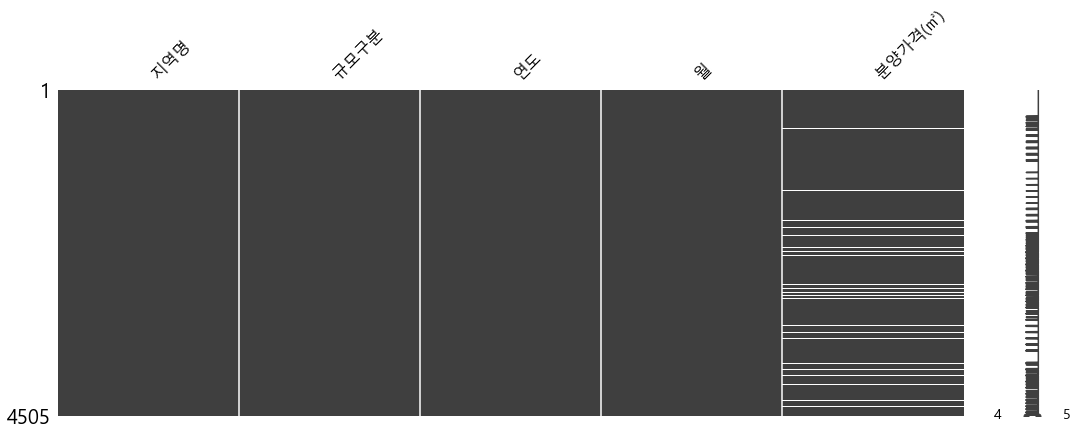

In [4]:
# 결측치 확인
msno.matrix(pre_sale, figsize=(18,6))

In [5]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [6]:
# 연도와 월은 Category형 데이터이므로 str로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [7]:
pre_sale_price = pre_sale['분양가격(㎡)']
pre_sale_price.head()

0    5841
1    5652
2    5882
3    5721
4    5879
Name: 분양가격(㎡), dtype: object

In [8]:
# 분양가격을 평당분양가격으로 변경(타입을 숫자로 변경 후 미터제곱을 평으로 환산)
pre_sale['평당분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce') * 3.3
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,19400.7


In [9]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
평당분양가격     float64
dtype: object

In [10]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 6 columns):
지역명        4505 non-null object
규모구분       4505 non-null object
연도         4505 non-null object
월          4505 non-null object
분양가격(㎡)    4210 non-null object
평당분양가격     4109 non-null float64
dtypes: float64(1), object(5)
memory usage: 211.2+ KB


In [11]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    295
평당분양가격     396
dtype: int64

In [12]:
pre_sale.describe()

,평당분양가격
count,4109.000000
mean,10761.001241
std,4256.120381
min,6164.400000
25%,8094.900000
50%,9527.100000
75%,11860.200000
max,45655.500000


In [13]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4505,4505,4505,4505,4210
unique,17,5,6,12,1795
top,세종,전용면적 60㎡초과 85㎡이하,2019,12,2221
freq,265,901,1020,425,17


In [14]:
# 2019년 데이터만 확인
pre_sale_2019 = pre_sale[pre_sale['연도'] == '2019']
print(pre_sale_2019.shape)
pre_sale_2019.head()

(1020, 6)


,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
3315,서울,전체,2019,1,7600,25080.0
3316,서울,전용면적 60㎡이하,2019,1,7400,24420.0
3317,서울,전용면적 60㎡초과 85㎡이하,2019,1,8105,26746.5
3318,서울,전용면적 85㎡초과 102㎡이하,2019,1,6842,22578.6
3319,서울,전용면적 102㎡초과,2019,1,7787,25697.1


In [15]:
pre_sale['규모구분'].value_counts()

전용면적 60㎡초과 85㎡이하     901
전용면적 85㎡초과 102㎡이하    901
전체                   901
전용면적 102㎡초과          901
전용면적 60㎡이하           901
Name: 규모구분, dtype: int64

In [16]:
pre_sale['지역명'].value_counts()

세종    265
강원    265
부산    265
대전    265
울산    265
제주    265
서울    265
경기    265
충남    265
광주    265
전북    265
인천    265
경북    265
전남    265
충북    265
대구    265
경남    265
Name: 지역명, dtype: int64

* 전국 평균 분양가격
    * groupby, pivot_table

In [17]:
pre_sale.groupby('연도').describe().T

연도                    2015         2016          2017          2018  \
평당분양가격 count    243.000000    984.00000    899.000000    919.000000   
       mean    9202.735802   9683.02500  10360.487653  10978.938411   
       std     3223.641902   3535.75715   3655.030071   3914.099768   
       min     6164.400000   6270.00000   6520.800000   6850.800000   
       25%     7342.500000   7530.60000   7804.500000   8332.500000   
       50%     8302.800000   8817.60000   9401.700000   9741.600000   
       75%     9984.150000  10390.05000  11404.800000  12203.400000   
       max    23403.600000  26716.80000  26027.100000  26723.400000   

연도                    2019          2020  
평당분양가격 count    912.000000    152.000000  
       mean   12188.293092  12718.069737  
       std     5158.578369   5723.328673  
       min     7009.200000   7580.100000  
       25%     8697.150000   8800.275000  
       50%    11203.500000  11716.650000  
       75%    13418.625000  13655.400000  
       max    42002.400000  45655.500000

In [18]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968,13818.970000
전용면적 60㎡이하,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371,11932.696875
전용면적 60㎡초과 85㎡이하,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531,11863.014706
전용면적 85㎡초과 102㎡이하,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923,14955.900000
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816,11892.908824


* 규모구분이 전체로 되어있는 금액으로 연도별 변동금액 확인

In [19]:
region_year_all = pre_sale[pre_sale['규모구분'] == '전체']
region_year_all.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841,19275.3
5,인천,전체,2015,10,3163,10437.9
10,경기,전체,2015,10,3138,10355.4
15,부산,전체,2015,10,3112,10269.6
20,대구,전체,2015,10,2682,8850.6


In [20]:
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year.head()

연도,지역명,2015,2016,2017,2018,2019,2020
0,강원,7159.9,7011.125,7126.8,7680.750,8141.65,8266.50
1,경기,10377.4,11220.000,11850.0,13185.975,14468.85,14858.25
2,경남,7585.6,7847.950,8119.8,9019.450,9870.85,10107.90
3,경북,7170.9,7360.650,7794.9,8505.200,8856.65,9287.85
4,광주,8052.0,8898.725,9463.5,9855.725,11822.80,12681.90


In [21]:
region_year['변동액'] = (region_year['2020'] - region_year['2015']).astype(int)

max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print(max_delta_price) 
print(min_delta_price)
print(mean_delta_price)

region_year.head()

6828000
319000
2999294.117647059


연도,지역명,2015,2016,2017,2018,2019,2020,변동액
0,강원,7159.9,7011.125,7126.8,7680.750,8141.65,8266.50,1106
1,경기,10377.4,11220.000,11850.0,13185.975,14468.85,14858.25,4480
2,경남,7585.6,7847.950,8119.8,9019.450,9870.85,10107.90,2522
3,경북,7170.9,7360.650,7794.9,8505.200,8856.65,9287.85,2116
4,광주,8052.0,8898.725,9463.5,9855.725,11822.80,12681.90,4629


In [22]:
region_year.sort_values(by='변동액', ascending=False)

연도,지역명,2015,2016,2017,2018,2019,2020,변동액
8,서울,19725.2,20663.500,21375.9,22889.350,26131.050,26553.45,6828
14,제주,7405.2,9129.175,10830.9,11890.725,12137.950,13051.50,5646
5,대구,9232.3,10310.025,11455.8,12075.800,13852.025,14586.00,5353
4,광주,8052.0,8898.725,9463.5,9855.725,11822.800,12681.90,4629
1,경기,10377.4,11220.000,11850.0,13185.975,14468.850,14858.25,4480
6,대전,8098.2,8501.625,9044.7,10180.225,11777.700,11985.60,3887
11,인천,10484.1,10532.500,10736.7,11273.900,12634.875,13346.85,2862
9,세종,8750.5,8860.500,9135.3,10354.850,11078.925,11411.40,2660
7,부산,10307.0,10429.925,11577.9,12997.875,13116.400,12883.20,2576
2,경남,7585.6,7847.950,8119.8,9019.450,9870.850,10107.90,2522


## 시각화
* 앤스콤의 4인방
    * 아래 4개의 데이터는 평균, 표준편차, 상관계수가 같지만 시각화를 해소면 전혀 다른 데이터임을 알 수 있다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/990px-Anscombe%27s_quartet_3.svg.png)

In [28]:
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

* seaborn 막대그래프

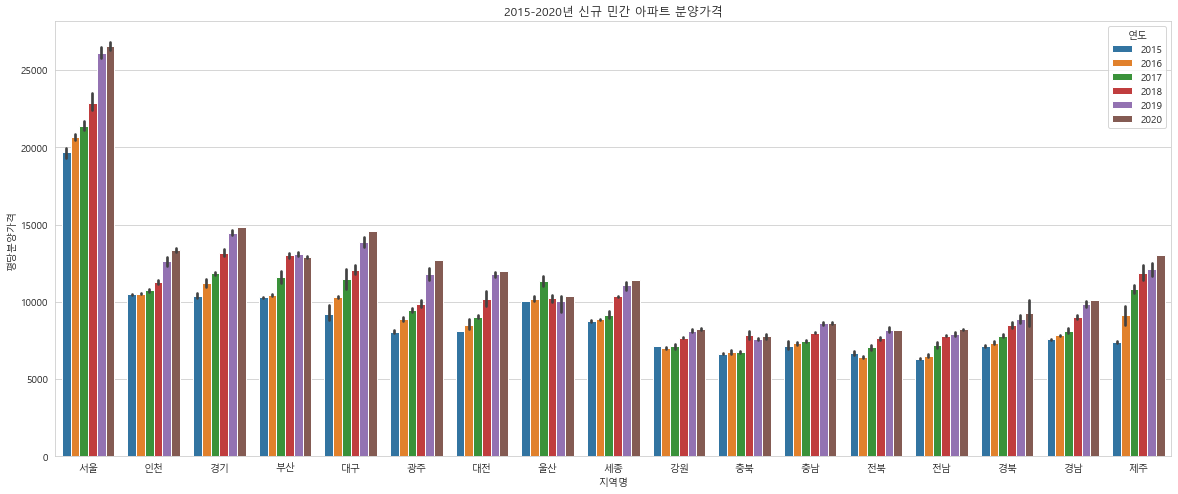

In [29]:
plt.figure(figsize=(20,8))
plt.title('2015-2020년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', hue='연도')

* pandas 막대그래프

In [30]:
df_year_region = pd.pivot_table(region_year_all, index=['지역명'], columns='연도', values='평당분양가격')
df_year_region.sample(3)

연도,2015,2016,2017,2018,2019,2020
지역명,,,,,,
경북,7170.9,7360.650,7794.9,8505.20,8856.65,9287.85
전북,6703.4,6417.950,7057.8,7625.75,8196.65,8144.40
강원,7159.9,7011.125,7126.8,7680.75,8141.65,8266.50


In [31]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018', '2019', '2020'], dtype='object', name='연도')

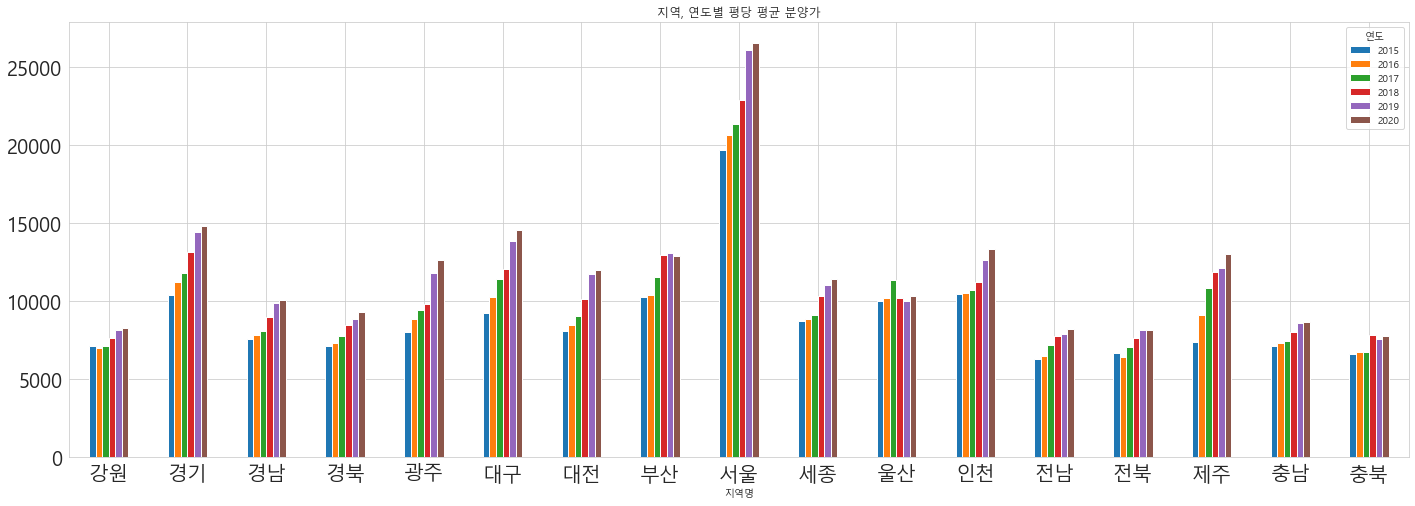

In [32]:
df_year_region.plot.bar(figsize=(24,8),
                       grid=True, fontsize=20, rot=0,
                       title='지역, 연도별 평당 평균 분양가')